In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import world cities's information

In [2]:
cities_name = np.genfromtxt('world_cities_full_info.csv',dtype='str',delimiter=',',usecols=(0))
cities_lat, cities_lng, cities_alt= np.genfromtxt('world_cities_full_info.csv',dtype='float',delimiter=',',usecols=(1,2,3),unpack = True)

In [3]:
#change the information in form of [ [name, latitude, longitude, altitude], ... ]
cities = np.array([cities_name, cities_lat, cities_lng, cities_alt]).transpose()
cities = cities.tolist()
i=0
while (i<len(cities)):
    cities[i][1]=float(cities[i][1])
    cities[i][2]=float(cities[i][2])
    cities[i][3]=float(cities[i][3])
    i+=1

In [4]:
#delete the cities below the sea level
tmp = cities
cities = list()
for e in tmp:
    if(e[3]>=0):
        cities.append(e)

# Normalized the interval of the data's position (transport is not a concern in morden world)

In [5]:
#normalize the x intervals and set Montreal as the origin
cities=sorted(cities, key=lambda x: x[1])

x=0
while (x<len(cities)):
    if(cities[x][0] == 'Montreal'):
        break
    x+=1
x = -x
i=0
while (i<len(cities)):
    cities[i][1]=x
    i+=1
    x+=1

In [6]:
#normalize the x intervals and set Montreal as the origin
cities=sorted(cities, key=lambda x: x[2])

y=0
while (y<len(cities)):
    if(cities[y][0] == 'Montreal'):
        break
    y+=1
y = -y
j=0
while (j<len(cities)):
    cities[j][2]=y
    j+=1
    y+=1

# Scatter the position of the normalized data points

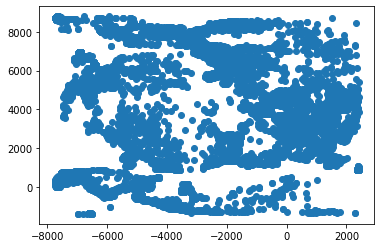

In [7]:
t1 = list()
for e in cities:
    t1.append(e[1])
t2 = list()
for e in cities:
    t2.append(e[2])
plt.scatter(t1,t2)

In [8]:
np.savetxt('normalized_cities_info.csv', cities, fmt='%s', delimiter = ',')